In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns
from itertools import product
from pandas import DataFrame

from itertools import cycle
import pandas as pd
from os.path import join
from collections import OrderedDict

from pyemma.util.contexts import settings
from glob import glob

In [2]:
t = md.load('./sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca6_ref0.xtc', 
            top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [33]:
print('How many residues? %s' % t.n_residues)
for i in [13,45,77,109,141,173]:
    print('Ala 13 residue: %s' % t.topology.residue(i))

How many residues? 192
Ala 13 residue: ALA13
Ala 13 residue: ALA45
Ala 13 residue: ALA77
Ala 13 residue: ALA109
Ala 13 residue: ALA141
Ala 13 residue: ALA173


In [34]:
selection = t.topology.select_expression('name CB and resid 13 45 77 109 141 173')
print(selection)

[atom.index for atom in topology.atoms if (atom.name == 'CB' and atom.residue.index in [13, 45, 77, 109, 141, 173])]


In [35]:
[atom.index for atom in t.topology.atoms if (atom.name == 'CB' and atom.residue.index in [13, 45, 77, 109, 141, 173])]

[189, 657, 1125, 1593, 2061, 2529]

In [16]:
traj_list=sorted(glob("./sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca*_ref0.xtc"))
traj_list

['./sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca1_ref0.xtc',
 './sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca2_ref0.xtc',
 './sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca3_ref0.xtc',
 './sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca4_ref0.xtc',
 './sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca5_ref0.xtc',
 './sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca6_ref0.xtc']

## Loading data

In [ ]:
sasa_all=[]
traj_list=sorted(glob("./sample_structures/2-Without_IPA/4-MSM_1000_samples_per_ref/pcca*_ref0.xtc"))
for t in traj_list:
    traj = md.load(t, top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')

        
    sasa=md.shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='residue', 
                         change_radii=None, get_mapping=False)
    sasa_all.append(sasa)


In [ ]:
for i in [13,45,77,109,141,173]:
    print(np.mean(sasa_all[1][:,i]), np.std(sasa_all[1][:,i]))

In [6]:
for s in range(0,6):
    print('PCCA',s+1,'\n')
    for i in [13,45,77,109,141,173]:
        print(np.mean(sasa_all[s][:,i]), np.std(sasa_all[s][:,i]))
    print('\n')

PCCA 1 

0.0055112825 0.035875753
0.0007394868 0.0035714982
0.12836124 0.09410487
0.14403342 0.060615297
0.017749367 0.041385178
0.031144068 0.05271551


PCCA 2 

0.0059987647 0.03826978
0.0008029152 0.0032321205
0.07785045 0.08841157
0.14248718 0.06557926
0.035164386 0.08725291
0.03514605 0.04570259


PCCA 3 

0.015869142 0.0703077
0.00078479317 0.003242416
0.037611566 0.07025408
0.19739765 0.11793168
0.07363216 0.12514457
0.040208515 0.05802555


PCCA 4 

0.15453957 0.17373762
0.0024938695 0.006093023
0.03132605 0.04896918
0.029415386 0.06418277
0.2820518 0.10594648
0.013454418 0.024516035


PCCA 5 

0.14725007 0.16453454
0.0036073818 0.008073251
0.03161399 0.0505406
0.14945981 0.1533722
0.18323784 0.17153387
0.008590511 0.020339163


PCCA 6 

0.036990352 0.10394108
0.0018330234 0.0054312362
0.044606876 0.05675322
0.03944332 0.08440136
0.30528477 0.109655604
0.007829415 0.015648723




# SASA calculated using Amber `surf` command

## From crystal Structure

In [2]:
traj_open = pt.iterload('../1-Trajectories/0-Parm_rst/open10_dry.rst7', 
                        '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

sasa_open_all=[pt.surf(traj_open, ':46@CB'), 
               pt.surf(traj_open, ':78@CB'), 
               pt.surf(traj_open, ':110@CB'), 
               pt.surf(traj_open, ':142@CB'), 
               pt.surf(traj_open, ':174@CB'), 
               pt.surf(traj_open, ':14@CB')]

sasa_open_all

[array([3.37796071]),
 array([10.468972]),
 array([4.83080351]),
 array([10.39704819]),
 array([4.28204619]),
 array([2.95710921])]

In [3]:
traj_closed = pt.iterload('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
                          '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

sasa_closed_all=[pt.surf(traj_closed , ':46@CB'), 
                 pt.surf(traj_closed , ':78@CB'),
                 pt.surf(traj_closed , ':110@CB'),
                 pt.surf(traj_closed , ':142@CB'),
                 pt.surf(traj_closed , ':174@CB'),
                 pt.surf(traj_closed , ':14@CB')]

sasa_closed_all

[array([4.58195891]),
 array([7.76625221]),
 array([20.33505007]),
 array([4.41514841]),
 array([6.47253504]),
 array([5.51322351])]

## Without IPA

In [12]:
sasa_1=[]
sasa_2=[]
sasa_3=[]
sasa_4=[]
sasa_5=[]
sasa_6=[]

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))

for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7", stride=1)
    sasa_6.append(pt.surf(traj, ':14@CB'))
    sasa_1.append(pt.surf(traj, ':46@CB'))
    sasa_2.append(pt.surf(traj, ':78@CB'))
    sasa_3.append(pt.surf(traj, ':110@CB'))
    sasa_4.append(pt.surf(traj, ':142@CB'))
    sasa_5.append(pt.surf(traj, ':174@CB'))


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref1.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7", stride=1)
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':14@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':46@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':78@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':110@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':142@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref2.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7", stride=1)
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':14@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':46@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':78@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':110@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':142@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref3.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7", stride=1)
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':14@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':46@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':78@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':110@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':142@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref4.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7", stride=1)
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':14@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':46@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':78@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':110@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':142@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref5.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7", stride=1)
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':14@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':46@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':78@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':110@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':142@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':174@CB'))
    count+=1

sasa_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

In [ ]:
print(len(sasa_1), len(sasa_1[0]), len(sasa_all))

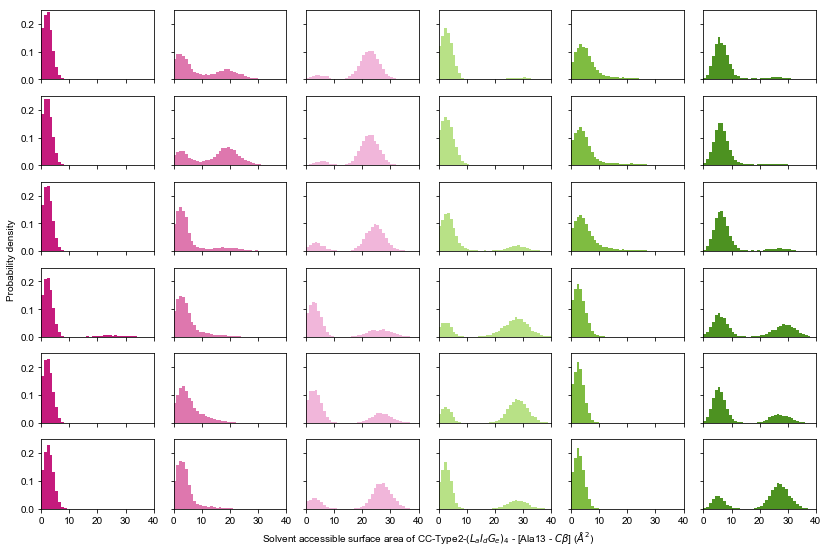

In [13]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[1,1,1,1,1,1,
      0,0,0,0,0,0,
      2,2,2,2,2,2,
      3,3,3,3,3,3,
      5,5,5,5,5,5,
      4,4,4,4,4,4]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(6, 6, figsize=(12, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))     


# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($L_aI_dG_e)_4$ - [Ala13 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

In [21]:
weights=[0.018,0.074,0.040,0.053,0.196,0.620]

exposed=[]
tot=[]
for j in range(0,6):
    a=[]
    for i in range(0,6):
        a.append(np.size(np.where(sasa_all[i][j]>=10)))
    exposed.append(a)



array([18292, 16380, 14743, 16923, 18164, 14763])

In [22]:
np.array(exposed)

array([[   5, 6465, 9042,  197, 1146, 1437],
       [  11, 3826, 8856,  659, 1325, 1703],
       [  74, 1622, 7964, 1965, 1306, 1812],
       [ 732, 1110, 2818, 7193,  186, 4884],
       [  26,  583, 7570, 2442,   45, 7498],
       [  60, 1485, 2907, 7167,   40, 3104]])

In [25]:
np.array([   5, 6465, 9042,  197, 1146, 1437]).sum()

1.001

In [24]:
np.array(exposed).sum(axis=1)

array([18292, 16380, 14743, 16923, 18164, 14763])

In [32]:
np.multiply(np.array(exposed).sum(axis=1), np.array(weights)).sum()/60000

0.26235365

## With IPA

In [2]:
sasa_1=[]
sasa_2=[]
sasa_3=[]
sasa_4=[]
sasa_5=[]
sasa_6=[]

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))

for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7", stride=1)
    sasa_6.append(pt.surf(traj, ':14@CB'))
    sasa_1.append(pt.surf(traj, ':46@CB'))
    sasa_2.append(pt.surf(traj, ':78@CB'))
    sasa_3.append(pt.surf(traj, ':110@CB'))
    sasa_4.append(pt.surf(traj, ':142@CB'))
    sasa_5.append(pt.surf(traj, ':174@CB'))


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref1.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7", stride=1)
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':14@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':46@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':78@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':110@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':142@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref2.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7", stride=1)
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':14@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':46@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':78@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':110@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':142@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref3.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7", stride=1)
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':14@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':46@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':78@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':110@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':142@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref4.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7", stride=1)
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':14@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':46@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':78@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':110@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':142@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref5.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7", stride=1)
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':14@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':46@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':78@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':110@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':142@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':174@CB'))
    count+=1

sasa_ipa_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

In [3]:
print(len(sasa_1), len(sasa_1[0]), len(sasa_ipa_all))

5 10000 6


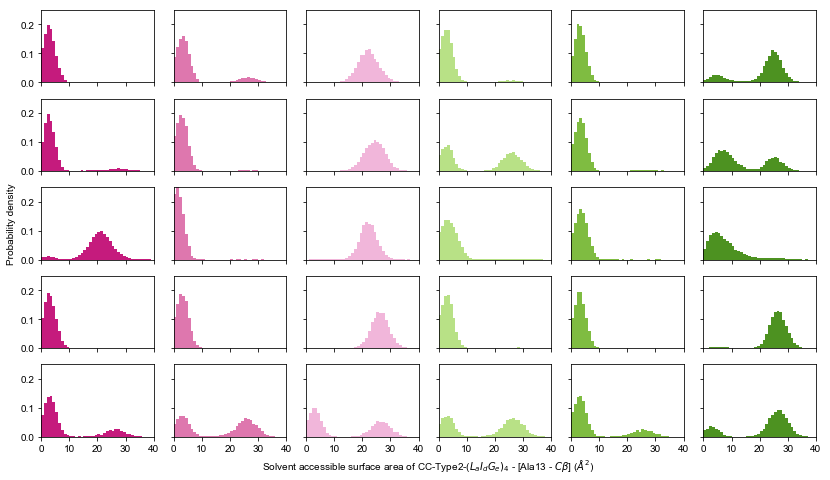

In [4]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(5, 6, figsize=(12, 7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_ipa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($L_aI_dG_e)_4$ - [Ala13 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/1-With_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

In [5]:
weights=[0.029693,0.099180,0.194989,0.162358,0.513779]

exposed=[]
tot=[]
for j in range(0,5):
    a=[]
    for i in range(0,6):
        a.append(np.size(np.where(sasa_ipa_all[i][j]>=10)))
    exposed.append(a)


In [6]:
np.array(exposed).sum(axis=1)

array([27690, 21462, 20282, 22389, 20190])

In [8]:
np.multiply(np.array(exposed).sum(axis=1), np.array(weights)).sum()/60000

0.3485633083333333

## CCHex2

In [33]:
traj_list=sorted(glob("../1-Trajectories/5-CC-Hex2/ccHex2_*_prod_dry.nc"))
traj = pt.iterload(traj_list, "../1-Trajectories/5-CC-Hex2/ccHex2_dry.parm7", stride=10)

sasa_6=[pt.surf(traj, ':19@CB')]
sasa_1=[pt.surf(traj, ':51@CB')]
sasa_2=[pt.surf(traj, ':83@CB')]
sasa_3=[pt.surf(traj, ':115@CB')]
sasa_4=[pt.surf(traj, ':147@CB')]
sasa_5=[pt.surf(traj, ':179@CB')]
        
sasa_cchex2_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

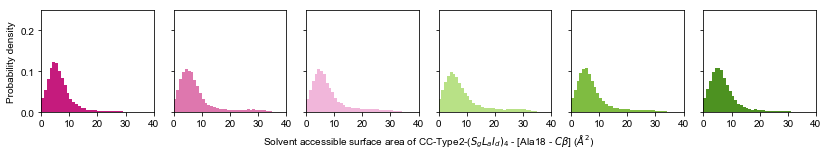

In [41]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']

fig, axes = plt.subplots(1, 6, figsize=(12, 2.5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_cchex2_all[i], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($S_gL_aI_d)_4$ - [Ala18 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/4-ccHex2/32_SASA_Ala13_CB_amber.png', dpi=600)

## Without IPA - ref0 only

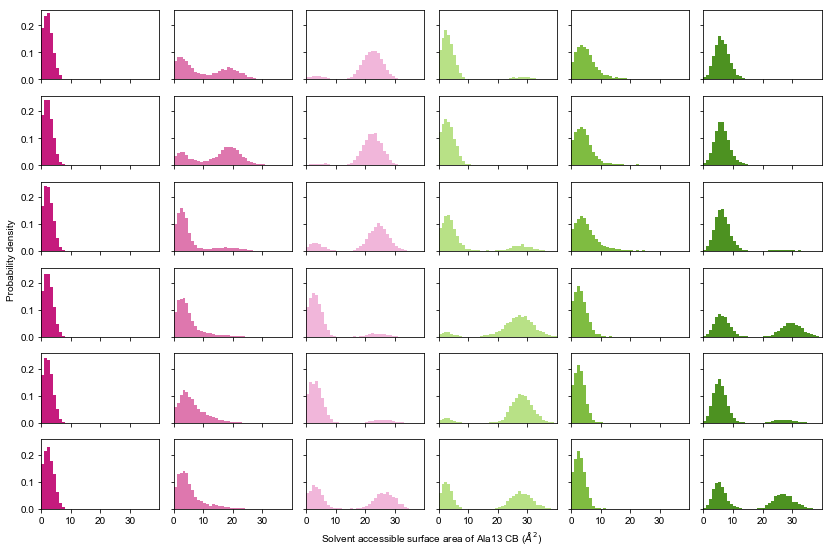

In [47]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[1,1,1,1,1,1,
      0,0,0,0,0,0,
      2,2,2,2,2,2,
      3,3,3,3,3,3,
      5,5,5,5,5,5,
      4,4,4,4,4,4]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(6, 6, figsize=(12, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 40, 10))    
#     ax.set_ylim(0,8000)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

## With IPA - Ref0 only

In [48]:
traj_list_ipa=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))
sasa_ipa_a=[]
sasa_ipa_b=[]
sasa_ipa_c=[]
sasa_ipa_d=[]
sasa_ipa_e=[]
sasa_ipa_f=[]
for t in traj_list_ipa:
    traj = pt.iterload(t, '../1-Trajectories/0-Parm_rst/open10_dry.parm7', stride=1)
    sasa_ipa_a.append(pt.surf(traj, ':14@CB'))
    sasa_ipa_b.append(pt.surf(traj, ':46@CB'))
    sasa_ipa_c.append(pt.surf(traj, ':78@CB'))
    sasa_ipa_d.append(pt.surf(traj, ':110@CB'))
    sasa_ipa_e.append(pt.surf(traj, ':142@CB'))
    sasa_ipa_f.append(pt.surf(traj, ':174@CB'))

In [50]:
sasa_ipa_all=[sasa_ipa_b, sasa_ipa_c, sasa_ipa_d, sasa_ipa_e, sasa_ipa_f, sasa_ipa_a]

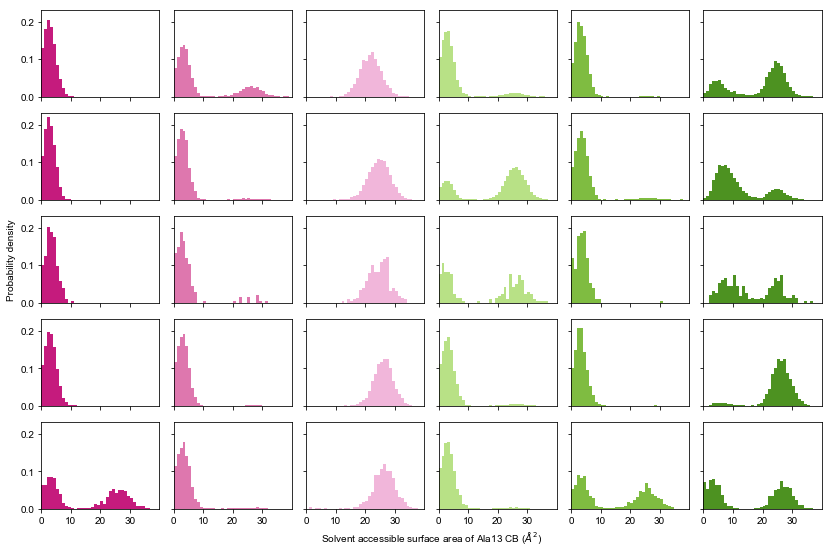

In [51]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(5, 6, figsize=(12, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_ipa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 40, 10))    
#     ax.set_ylim(0,8000)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/1-With_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

In [52]:
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

for i in range(0,30):
    print(chains[i],pcca[i])

0 2
1 2
2 2
3 2
4 2
5 2
0 1
1 1
2 1
3 1
4 1
5 1
0 3
1 3
2 3
3 3
4 3
5 3
0 4
1 4
2 4
3 4
4 4
5 4
0 0
1 0
2 0
3 0
4 0
5 0


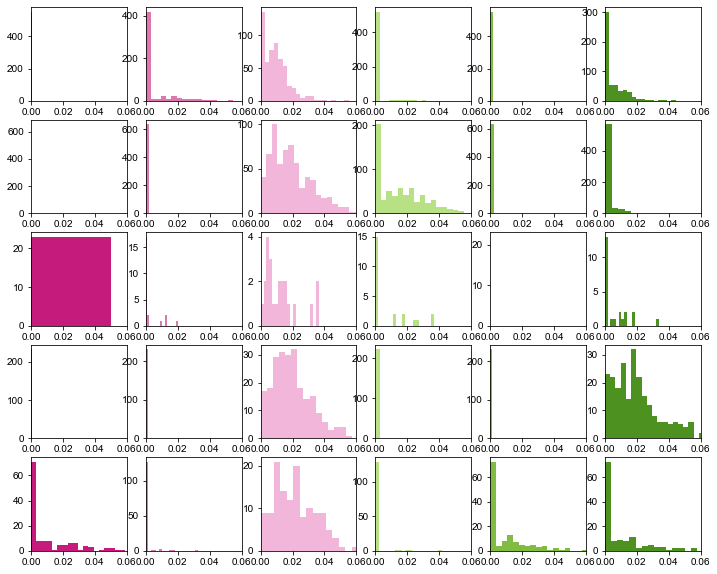

In [88]:
#mapped as (B,C,D)(E,F,A)
at=[657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

fig, axes = plt.subplots(5, 6, figsize=(12, 10), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    sns.distplot(sasa_all_ipa[pcca[i]][:,at[i]], kde=False, ax=ax, bins=20, 
                 color=colours[i], hist_kws={"alpha": 1})

    ax.set_xlim(0,0.06)
#     ax.set_ylim(0,700)
#     ax.set_xticks(np.arange(0, 5, 1))    

#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

# # To have common x and y labels
# # add a big axis, hide frame
# fig.add_subplot(111, frameon=False)
# # hide tick and tick label of the big axis
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
# plt.xlabel(r'RMSD to closed crystal structure ($\AA$)')
# plt.ylabel(r'RMSD to open crystal structure ($\AA$)')

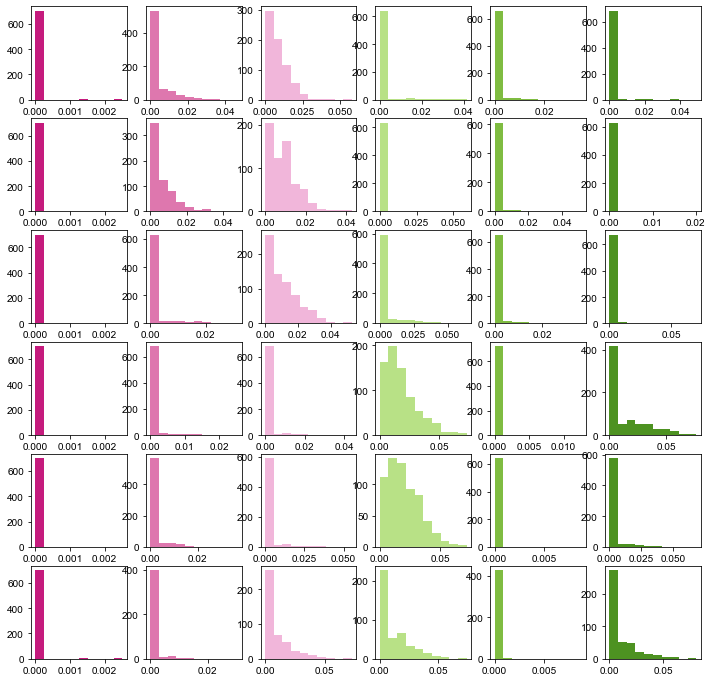

In [87]:
#mapped as (B,C,D)(E,F,A)
at=[657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,1,1,1,1,1,
      2,0,0,0,0,0,
      2,2,2,2,2,2,
      2,3,3,3,3,3,
      2,5,5,5,5,5,
      2,4,4,4,4,4]

fig, axes = plt.subplots(6, 6, figsize=(12, 12), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    sns.distplot(sasa_all[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10, 
                 color=colours[i], hist_kws={"alpha": 1})

#     ax.set_xlim(0,0.06)
#     ax.set_xticks(np.arange(0, 5, 1))    
#     ax.set_ylim(0,700)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

## Without IPA

In [89]:
traj_list_2=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))
sasa_all_at_2=[]
for t in traj_list_2:
    traj = md.load(t, top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')
    sasa=md.shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', 
                         change_radii=None, get_mapping=False)
    sasa_all_at_2.append(sasa)

with open('./pickled/2-Without_IPA/sasa_all_at_2.pickle', 'wb') as outf:
    pickle.dump(sasa_all_at_2, outf)

In [90]:
sasa_all_res_2=[]
for t in traj_list_2:
    traj = md.load(t, top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')
    sasa=md.shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='residue', 
                         change_radii=None, get_mapping=False)
    sasa_all_res_2.append(sasa)

with open('./pickled/2-Without_IPA/sasa_all_res_2.pickle', 'wb') as outf:
    pickle.dump(sasa_all_res_2, outf)

In [7]:
with open('./pickled/2-Without_IPA/sasa_all_at_2.pickle', 'rb') as inf:
    sasa_all_at_2 = pickle.load(inf)
with open('./pickled/2-Without_IPA/sasa_all_res_2.pickle', 'rb') as inf:
    sasa_all_res_2 = pickle.load(inf)

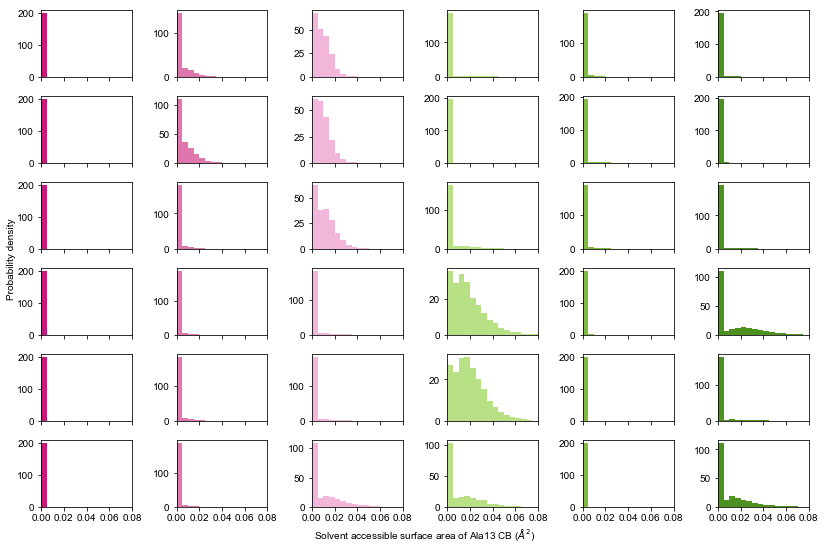

In [59]:
# mapped as (B,C,D)(E,F,A)
at=[657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[1,1,1,1,1,1,
      0,0,0,0,0,0,
      2,2,2,2,2,2,
      3,3,3,3,3,3,
      5,5,5,5,5,5,
      4,4,4,4,4,4]

fig, axes = plt.subplots(6, 6, figsize=(12, 8), sharex=True, sharey=False)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all_at_2[pcca[i]][:,at[i]], bins=16, density=True,
            range=(0.0,0.08),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,0.08)
    ax.set_xticks(np.arange(0, 0.09, 0.02))    
#     ax.set_ylim(0,8000)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/30_SASA_Ala13_CB.png', dpi=600)

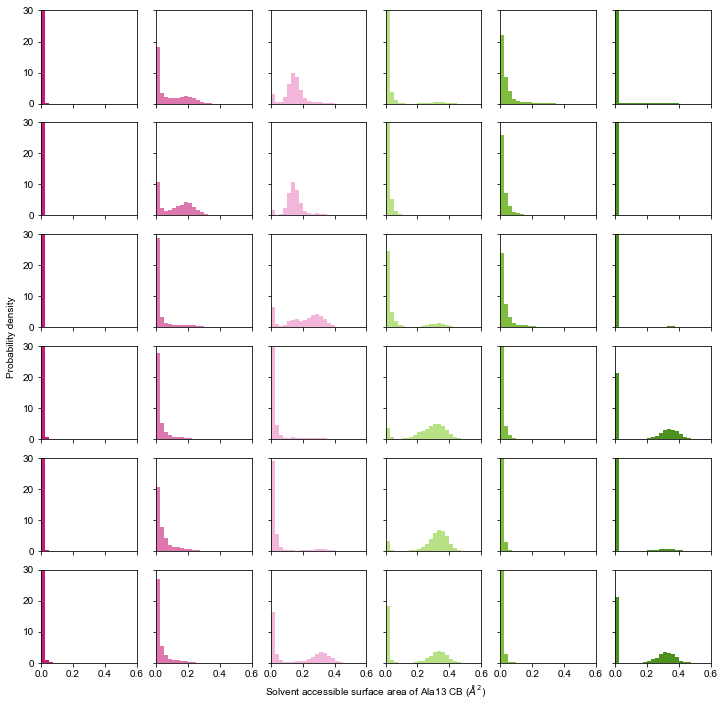

In [78]:
#mapped as (B,C,D)(E,F,A)
at=[45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[1,1,1,1,1,1,
      0,0,0,0,0,0,
      2,2,2,2,2,2,
      3,3,3,3,3,3,
      5,5,5,5,5,5,
      4,4,4,4,4,4]

fig, axes = plt.subplots(6, 6, figsize=(12, 12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all_res_2[pcca[i]][:,at[i]], bins=24, density=True,
            range=(0.0,0.6),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,0.60)
    ax.set_xticks(np.arange(0, 0.7, 0.2))    
    ax.set_ylim(0.0,30)
    ax.set_yticks(np.arange(0, 40, 10))
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

# fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/31_SASA_Ala13_residue.png', dpi=600)

## With IPA

In [3]:
traj_list_ipa_2=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))
sasa_all_at_ipa_2=[]
for t in traj_list_2:
    traj = md.load(t, top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')
    sasa=md.shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', 
                         change_radii=None, get_mapping=False)
    sasa_all_at_ipa_2.append(sasa)

with open('./pickled/1-With_IPA/sasa_all_at_ipa_2.pickle', 'wb') as outf:
    pickle.dump(sasa_all_at_ipa_2, outf)

In [4]:
sasa_all_res_ipa_2=[]
for t in traj_list_2:
    traj = md.load(t, top='../1-Trajectories/0-Parm_rst/open10_dry.parm7')
    sasa=md.shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='residue', 
                         change_radii=None, get_mapping=False)
    sasa_all_res_ipa_2.append(sasa)

with open('./pickled/1-With_IPA/sasa_all_res_ipa_2.pickle', 'wb') as outf:
    pickle.dump(sasa_all_res_ipa_2, outf)

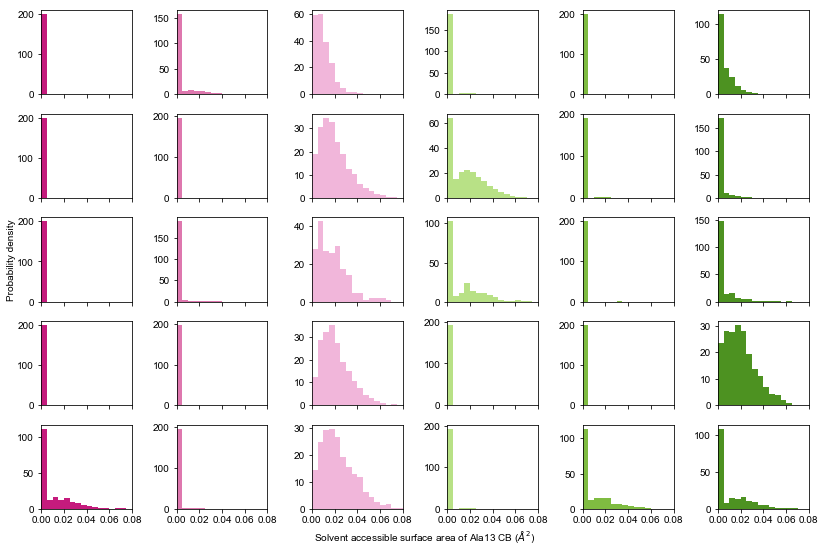

In [71]:
#mapped as (B,C,D)(E,F,A)
at=[657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189,
    657, 1125, 1593, 2061, 2529, 189]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

fig, axes = plt.subplots(5, 6, figsize=(12, 8), sharex=True, sharey=False)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all_at_ipa_2[pcca[i]][:,at[i]], bins=16, density=True,
            range=(0.0,0.08),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,0.08)
    ax.set_xticks(np.arange(0, 0.09, 0.02))    
#     ax.set_ylim(0,8000)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/1-With_IPA/30_SASA_Ala13_CB.png', dpi=600)

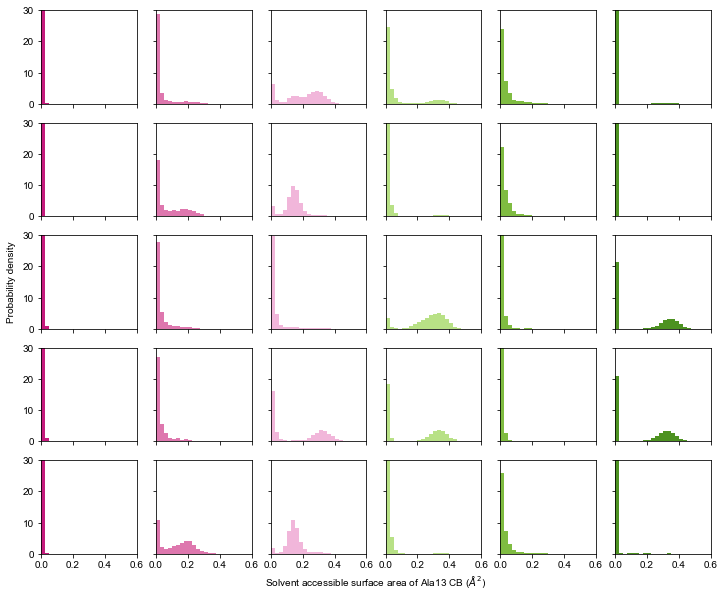

In [76]:
#mapped as (B,C,D)(E,F,A)
at=[45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13,
    45,77,109,141,173,13]

colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

fig, axes = plt.subplots(5, 6, figsize=(12, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all_res_2[pcca[i]][:,at[i]], bins=24, density=True,
            range=(0.0,0.6),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,0.60)
    ax.set_xticks(np.arange(0, 0.7, 0.2))    
    ax.set_ylim(0.0,30)
    ax.set_yticks(np.arange(0, 40, 10))     
#     ax.set_aspect('equal')

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of Ala13 CB ($\AA^2$)')
plt.ylabel(r'Probability density')

# fig.tight_layout()
fig.savefig('./plots/1-With_IPA/31_SASA_Ala13_residue.png', dpi=600)